# Toy model

Try to do the step by step quantum-classical matching using a toy model

### Canonic momentum

Do the classical calculation

In [ ]:
import numpy as np

xp_class = np.linspace(0, 2.5, 1000)

py2_class = 4/3*xp_class**2/4

Import quantum results

In [2]:
# We create a list with the files to read

Nc = 3

file_list = ['/lustre/HQCD/carlos.lamas/qJetLFH_MixColor/output/full_toy_model/result_{0}_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_Gaussian_inP_nx0_ny0_wx_10.000000_wy_10.000000_cQ_%i_hQ_1_mq0_0.100_mq_0.100_mg_0.150_Lperp_2_Nperp_64_Leta_2.500000_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_32/PIperp/evolution_Piperp_sq_exp_autonomy.dat' %nc for nc in range(Nc)]

In [3]:
# We convert to an array of DataFrames

import pandas as pd 
import numpy as np

df_list = []

for c in range(Nc):
    df = pd.read_table(file_list[c], header = None)
    df_list.append(df)

data = np.array(df_list)

In [4]:
data_av_col = np.average(data, axis=0)

In [5]:
xp = data_av_col[:, 0]
py2 = data_av_col[:, 5]
pz2 = data_av_col[:, 1]

py2 -= py2[0]
pz2 -= pz2[0]

Plot the results

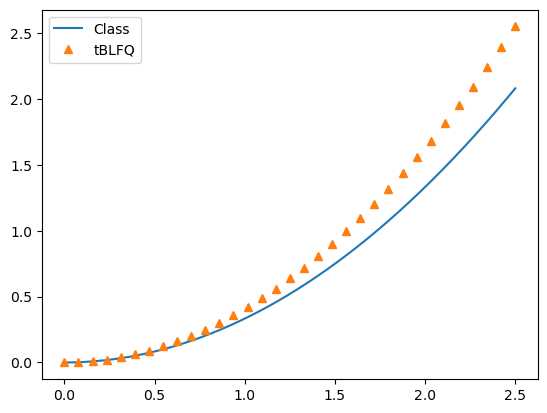

In [6]:
import matplotlib.pyplot as plt

plt.plot(xp_class, py2_class, label='Class')
plt.plot(xp, py2, '^', label='tBLFQ')

plt.legend()
plt.savefig('CanonicMomentum.png')

### Field contribution

Classical calculation

In [7]:
Ay2_class = 4/3*xp_class**2/(xp_class + 2)**2

In [8]:
Ay2 = data_av_col[:, 6]
Az2 = data_av_col[:, 2]

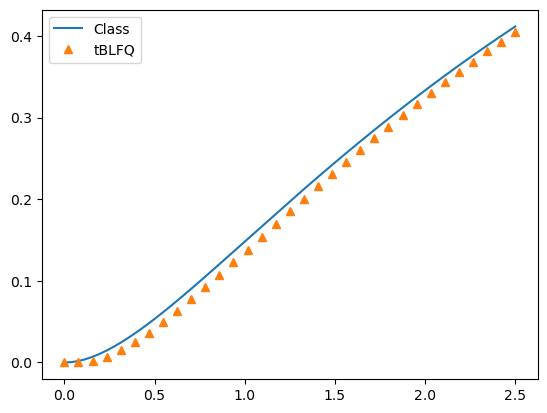

In [9]:
import matplotlib.pyplot as plt

plt.plot(xp_class, Ay2_class, label='Class')
plt.plot(xp, Ay2, '^', label='tBLFQ')

plt.legend()
plt.savefig('FieldContribution.png')